<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/PSD_histogram_ANN_r_squared_ago_26_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [ ]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)
Img_Size = 28

In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     184  253.114349  250.017471  ...  163.355377  166.816162  162.337418
1     164  159.576431  132.502090  ...  135.886368  138.710892  145.581787
2     183  183.755264  185.328629  ...    1.269312    0.128789    1.329422
3     133  170.711899  166.612198  ...  247.842117  251.880890  254.085876
4     178  113.979431  111.269165  ...  155.007706  148.450317  132.045334
5     143  100.795967   98.406723  ...    0.492885    0.408969    1.429948
6     115   68.954254   65.572472  ...  152.954636  150.113251  142.234100
7     183  139.351395  129.314438  ...    1.269312    0.128789    1.329422
8     130  142.942490  138.786285  ...  248.254669  248.856827  248.514099
9     126  193.567902  192.456802  ...  252.728394  253.074081  252.259277
10    129  121.867561  126.214409  ...  133.104980  128.920441  128.351837
11    190  187.408417  180.439102  ...  161.992905  152.040100  148.743271
12    114   90.450912  10

In [ ]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = 'ANN without convolution '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Flatten())
model.add(Dense(units=N1))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 24s 81ms/step - loss: 0.6931 - accuracy: 0.4847 - val_loss: 0.6899 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.4995 - val_loss: 0.6860 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.5168 - val_loss: 0.6795 - val_accuracy: 0.5510
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5525 - val_loss: 0.6726 - val_accuracy: 0.5578
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.5781 - val_loss: 0.6649 - val_accuracy: 0.5578
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6625 - accuracy: 0.6159 - val_loss: 0.6549 - val_accuracy: 0.6735
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6681 - accuracy: 0.6576 - val_loss: 0.6497 - val_accuracy: 0.5850
Epoch 8/200

In [ ]:
Y_test = yback(Y_test)

In [ ]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        67   5
1         2  73


In [ ]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   124.0   49.781475   50.079082  ...   68.232048   75.217468   94.662842
1   109.0   71.474960   78.456192  ...   63.436237   70.593552   76.998566
2   188.0   35.418285   42.421005  ...    6.247623    6.215935    5.620190
6   127.0   60.390476   58.422722  ...   34.564884    8.062310    1.000000
8   183.0   78.908005   81.991821  ...  145.432678  151.349609  141.707230
10  198.0   52.067234   54.035198  ...   54.159576   60.785637   65.905518
11  107.0   92.065765   95.124725  ...   52.210670   36.727226   36.155994
13  163.0   56.860668   58.676464  ...   79.720200   70.884529   64.323723
15  155.0    0.085078    0.123621  ...    0.462601    0.088658    0.000000
18  125.0   89.957253   91.822350  ...   55.176262   57.910088   61.496517
19  178.0  207.535553  125.215141  ...   77.365494   55.221062   28.750160
21  128.0  118.627930  123.080078  ...   99.916992   98.119141   94.929688
24  192.0  162.530807   6

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,124.0,49.781475,50.079082,47.880333,43.773151,44.623306,46.336105,43.642036,43.623310,43.433922,44.044743,43.894897,42.920918,41.712795,41.551506,43.403744,45.159210,46.854317,50.423515,53.717999,61.404785,68.790840,73.082207,77.326744,82.018723,85.514053,86.508835,93.852234,96.668045,50.444324,49.459938,46.105095,44.928192,47.048901,46.498432,43.844952,44.354836,43.751297,44.651402,45.597290,...,21.676380,20.097815,29.744015,48.724243,57.673252,61.519249,66.454727,69.828300,71.337135,67.426636,69.586884,91.735687,94.009361,90.024971,86.914665,83.914673,81.844940,80.833496,78.798126,75.226845,75.122787,74.055145,74.126945,72.491142,63.625385,43.027054,27.045784,23.604576,19.913631,20.095732,35.847031,56.123829,62.260143,65.521332,68.232048,69.002083,70.896973,68.232048,75.217468,94.662842
1,109.0,71.474960,78.456192,77.404762,68.784271,65.971046,69.445335,67.268661,63.274384,57.632187,56.582108,53.114132,53.565441,55.840672,57.815079,59.149651,57.745560,52.744465,47.435314,43.184326,45.685974,49.960606,53.473610,56.262772,57.344666,57.179276,58.641281,59.057400,60.020451,84.795563,85.467888,74.432617,67.694801,68.772491,71.676453,65.960861,59.278931,56.890499,55.759956,53.381279,...,90.492805,99.850937,104.321846,109.962975,116.324966,112.302238,85.895966,61.332718,58.603477,60.736130,64.318489,69.908417,77.839737,79.023483,78.468056,79.381958,78.624771,77.777878,76.454842,74.932076,74.014397,74.170776,73.057991,73.503746,72.099403,71.350304,73.827454,81.368744,90.609123,99.855812,104.900253,110.465958,114.345673,109.487000,95.521919,71.636055,60.960861,63.436237,70.593552,76.998566
2,188.0,35.418285,42.421005,69.515167,96.645988,105.017654,105.245354,97.218651,99.826622,105.066994,99.149384,97.942520,101.666359,97.837021,96.540062,99.660019,105.187866,110.454956,113.416916,116.504295,117.066093,112.846535,81.926666,62.426888,61.039829,60.563602,60.584431,57.992760,56.399273,35.999996,35.679947,35.282028,55.449520,99.235847,116.694435,124.270248,119.385231,103.420105,100.074234,100.200089,...,0.315075,0.340425,0.340425,0.061566,0.042553,0.042553,0.305568,0.258941,0.244454,0.191489,0.191489,0.169307,5.594839,5.778633,5.946582,5.807152,5.861023,6.149388,6.488456,6.086012,6.143051,6.133545,6.517881,8.272974,9.579901,6.783160,5.918062,5.810321,6.333182,6.190584,6.231779,5.965595,5.639203,6.032141,7.353553,7.276595,6.277048,6.247623,6.215935,5.620190
6,127.0,60.390476,58.422722,36.294750,6.571269,6.485026,13.973898,28.969866,34.830364,37.471512,40.284084,40.434376,39.734264,37.954185,35.002602,32.942650,30.083206,30.011469,30.776678,31.514975,31.447392,32.794655,33.852005,36.889206,39.670532,42.036705,42.262138,37.875565,32.571457,59.031059,56.146194,39.566742,9.679087,8.750264,12.813504,25.628059,33.931118,36.628433,37.231319,36.972408,...,64.490173,63.216194,61.443546,60.390163,58.755035,57.454273,55.228279,54.686771,51.120777,41.828445,14.402071,0.998388,21.802467,42.028645,61.978737,63.735199,61.215263,62.666935,61.234856,66.218796,67.006325,67.274292,64.454956,64.945503,66.482300,65.878670,66.040794,67.039871,64.989273,62.769917,60.626141,58.015556,56.282227,53.789074,53.070927,52.565132,47.104034,34.564884,8.062310,1.000000
8,183.0,78.908005,81.991821,85.015175,86.614502,92.178276,90.299324,87.696289,98.299950,100.549789,100.848877,96.918770,93.094299,91.574425,95.063454,100.035118,103.804001,103.784081,100.818039,96.558868,91.355843,79.118248,81.576065,85.917984,87.988083,92.592674,93.498878,95.918869,101.296700,77.964172,80.332176,84.778259,84.710182,78.482552,77.918297,93.395599,99.537727,100.248741,97.771378,97.135330,...,96.970528,89.538841,85.321625,97.727730,101.887871,105.612495,112.334198,117.585960,127.362747,127.995605,108.032150,55.451256,

In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
X.shape

(490, 784)

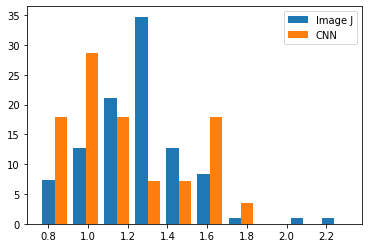

In [ ]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.07368421, 0.2       , 0.41052632, 0.75789474, 0.88421053,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.17857143, 0.46428571, 0.64285714, 0.71428571, 0.78571429,
         0.96428571, 1.        , 1.        , 1.        , 1.        ]]),
 array([0.75356807, 0.90995518, 1.06634229, 1.22272941, 1.37911652,
        1.53550363, 1.69189074, 1.84827785, 2.00466497, 2.16105208,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

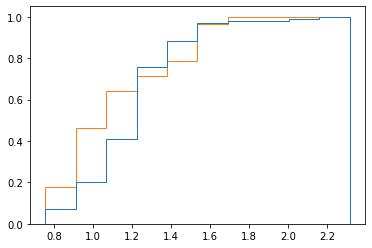

In [ ]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.8727793322958461


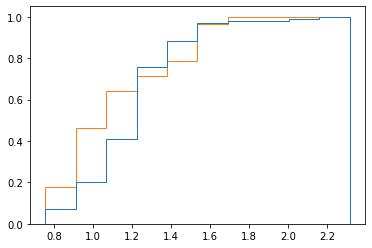

In [ ]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [ ]:
#df

In [ ]:
# r.history['accuracy']

In [ ]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [ ]:

df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a list of 2 Lists of Patches objects>
[0.75356807 0.90995518 1.06634229 1.22272941 1.37911652 1.53550363
 1.69189074 1.84827785 2.00466497 2.16105208 2.31743919]
[[ 7.36842105 12.63157895 21.05263158 34.73684211 12.63157895  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [17.85714286 28.57142857 17.85714286  7.14285714  7.14285714 17.85714286
   3.57142857  0.          0.          0.        ]]


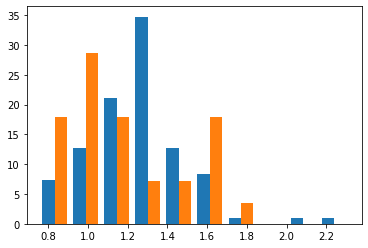

In [ ]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [ ]:
print(counts.sum())

200.00000000000006


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


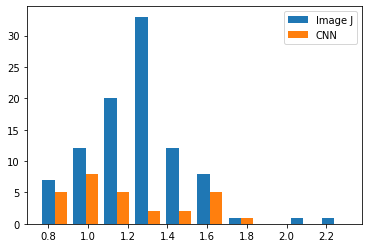

In [ ]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [ ]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1